#### Importing modules

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [202]:
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

#### Import the csv data as dataframe

In [156]:
df= pd.read_csv('data/raw.csv')

## 1.Understanding data

#### 1.1 basic info

In [157]:
# cheching data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [158]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [159]:
df.shape

(1000, 8)

In [160]:
# checking missing value
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [161]:
# check unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [162]:
# statistics of data 
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [163]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [164]:
# df.corr()  #need all numeric data otherwise you will get error

#### 1.2 Exploring Data

In [165]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75


In [166]:
print("gender", df['gender'].unique())
print("race_ethnicity", df['race_ethnicity'].unique())
print("parental_level_of_education", df['parental_level_of_education'].unique())
print("lunch", df['lunch'].unique())
print("test_preparation_course", df['test_preparation_course'].unique())
print("math_score", df['math_score'].unique())
print("reading_score", df['reading_score'].unique())
print("writing_score", df['writing_score'].unique())

      

gender ['female' 'male']
race_ethnicity ['group D' 'group C' 'group E' 'group B' 'group A']
parental_level_of_education ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
lunch ['standard' 'free/reduced']
test_preparation_course ['none' 'completed']
math_score [ 62  66  79  61  73  30  96  57  68  48  67  59  74  65  47  80  89  69
  53  64  82  36  90  52  51  63  40  46  77  99  70  42  97  50  43 100
  72  71  55  84  78  87  85  54  38  60  49  44  76  35  81  94  75  83
  98  92  93  88  32  39  86  41  58  22  56  95  24  37  18  91  45  23
  34  29  27   8  26   0  28  19  33]
reading_score [ 70  83  89  67  64  24 100  77  58  62  69  37  63  60  84  87  82  29
  95  65  73  59  55  42  43  76  78  57  41  97  66  39  47  53  46  72
  75  74  86  85  49  45  80  28  96  90  50  88  81  68  79  93  51  71
  92  44  34  61  48  52  54  56  38  94  91  32  99  40  31  26  17  23]
writing_score [ 75  83  86  66  57  15 100 

In [167]:
# define numerical and categorical column
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

print('we have {} numerical features : {}'.format(len(numerical_columns), numerical_columns))
print("we have {} categorical features : {}".format(len(categorical_columns), categorical_columns))


we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [168]:
df['total_score'] = df['math_score'] + df['reading_score'] +df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group D,master's degree,standard,none,62,70,75,207,69.000000
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232,77.333333
2,female,group D,some college,free/reduced,none,79,89,86,254,84.666667
3,male,group C,master's degree,free/reduced,none,61,67,66,194,64.666667
4,male,group E,high school,standard,none,73,64,57,194,64.666667


In [169]:
print("math_score full",df[df['math_score']==100]['average'].count())
print("reading_score full",df[df['reading_score']==100]['average'].count())
print("writing_score full",df[df['writing_score']==100]['average'].count())

math_score full 7
reading_score full 17
writing_score full 14


In [170]:
print("math_score <=20:",df[df['math_score']<=20]['average'].count())
print("reading_score <=20:",df[df['reading_score']<=20]['average'].count())
print("writing_score <=20:",df[df['writing_score']<=20]['average'].count())

math_score <=20: 4
reading_score <=20: 1
writing_score <=20: 3


#### 1.3 EDA

##### 1.3.1 Univarient analysis , CATEGORICAL

In [171]:
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

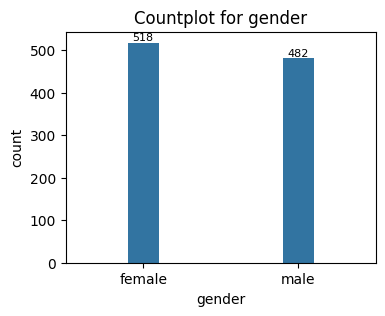

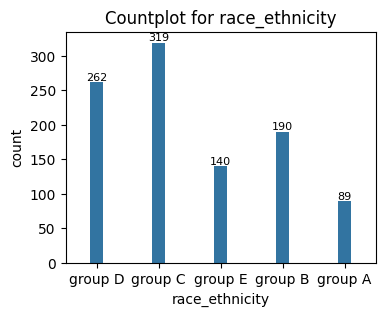

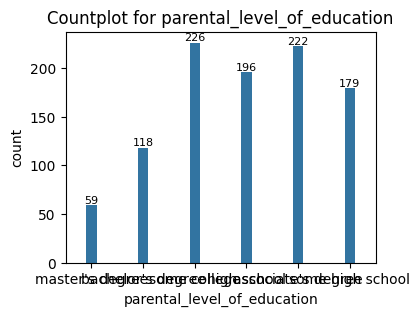

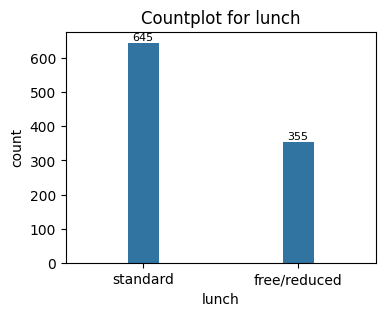

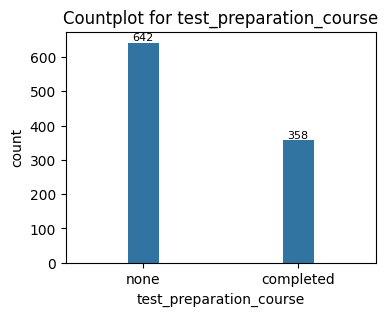

In [172]:
bar_width = 0.2
for cat_col in categorical_columns:
    plt.figure(figsize=(4,3))
    ax = sns.countplot(data = df, x=cat_col, width=bar_width )
    plt.title(f"Countplot for {cat_col}")

    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() /2, p.get_height()+0.02, int(p.get_height()),fontsize=8, ha = 'center', va='bottom')
        
    plt.show()

##### 1.3.1 Univarient analysis , NUMERICAL

In [173]:
numerical_columns

['math_score', 'reading_score', 'writing_score']

-0.2789351490943169


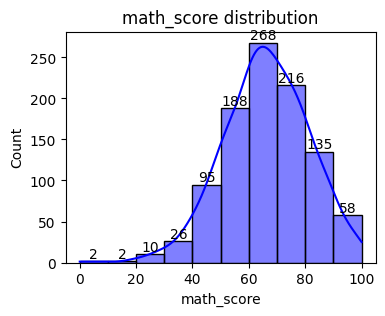

-0.2591045181092306


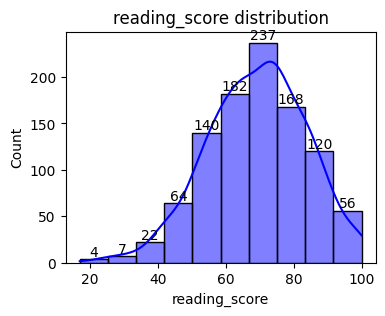

-0.289443971507619


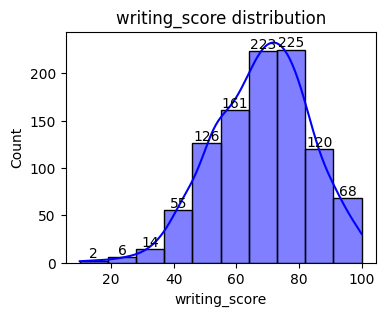

In [174]:

for num_col in numerical_columns:
    # print(index)
    plt.figure(figsize=(4,3))
    ax = sns.histplot(data=df, x=num_col, bins=10, kde=True, color='blue')  
    plt.title(f"{num_col} distribution")
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2, p.get_height()+0.02, int(p.get_height()), ha="center", va="bottom", fontsize=10 )
    print(df[num_col].skew())
    plt.show()

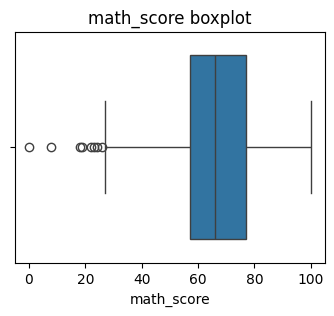

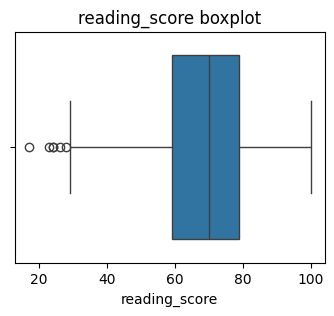

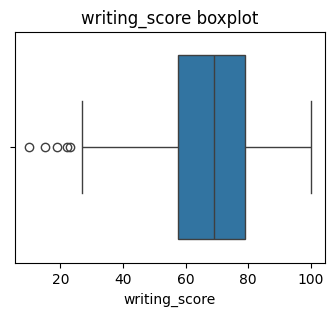

In [175]:
for num_col in numerical_columns:
    plt.figure(figsize=(4,3))
    ax = sns.boxplot(data=df, x=num_col)  
    plt.title(f"{num_col} boxplot")
    plt.show()

##### 1.3.2 Bivariate and multivariate analysis

###### num-num (scatterplot, pairplot, lineplot)

In [176]:
len(numerical_columns)

3

In [177]:
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

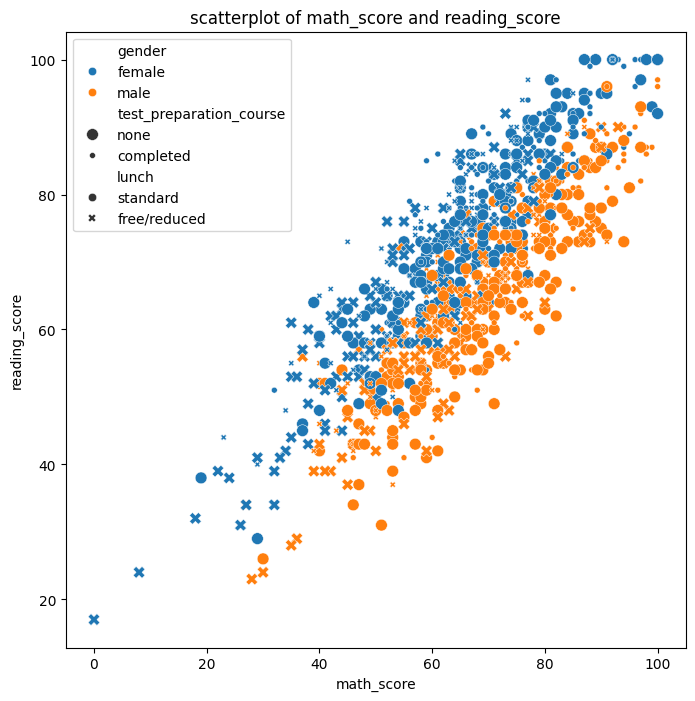

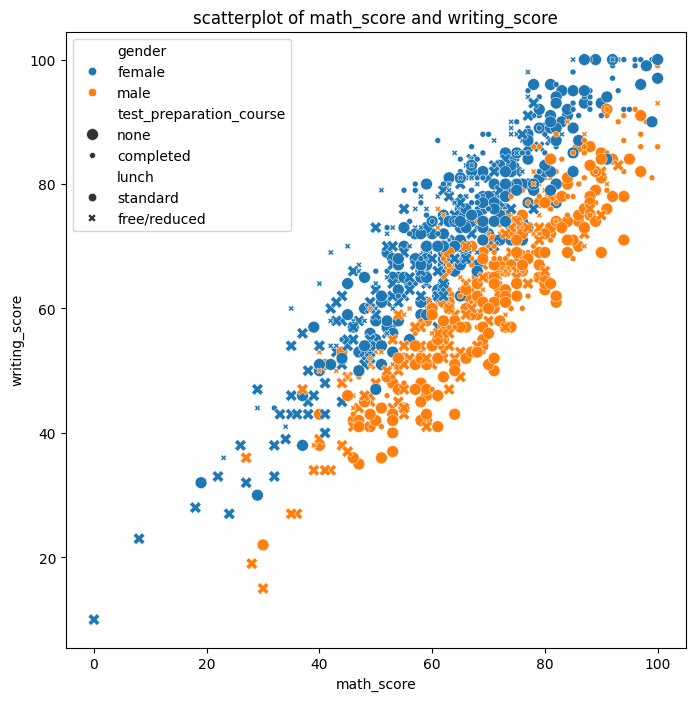

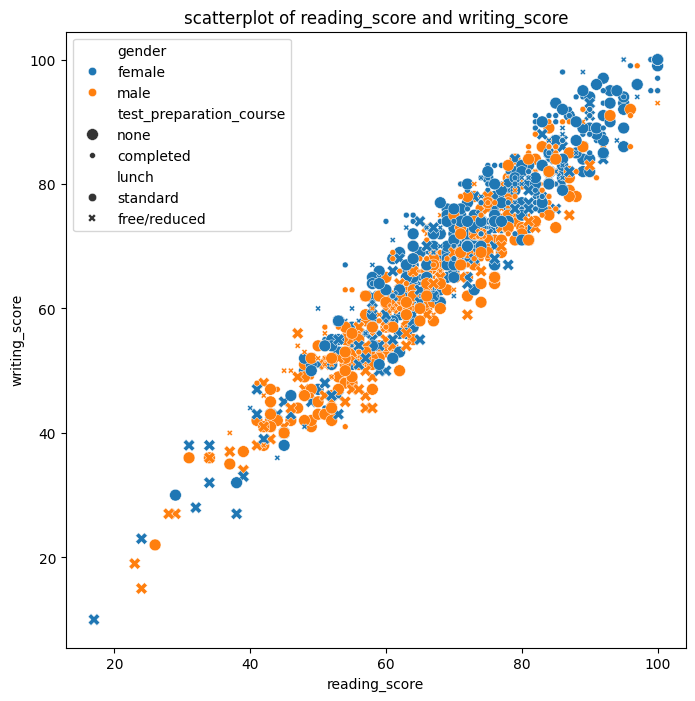

In [178]:
for i in range (0,len(numerical_columns)):
    for j in range (i+1,len(numerical_columns)):
        hue_col=numerical_columns
        plt.figure(figsize=(8,8))
        sns.scatterplot(data =df , x=numerical_columns[i], y= numerical_columns[j], hue=df['gender'], style=df['lunch'], size=df['test_preparation_course'])
        plt.title(f"scatterplot of {numerical_columns[i]} and {numerical_columns[j]}")
        plt.show()


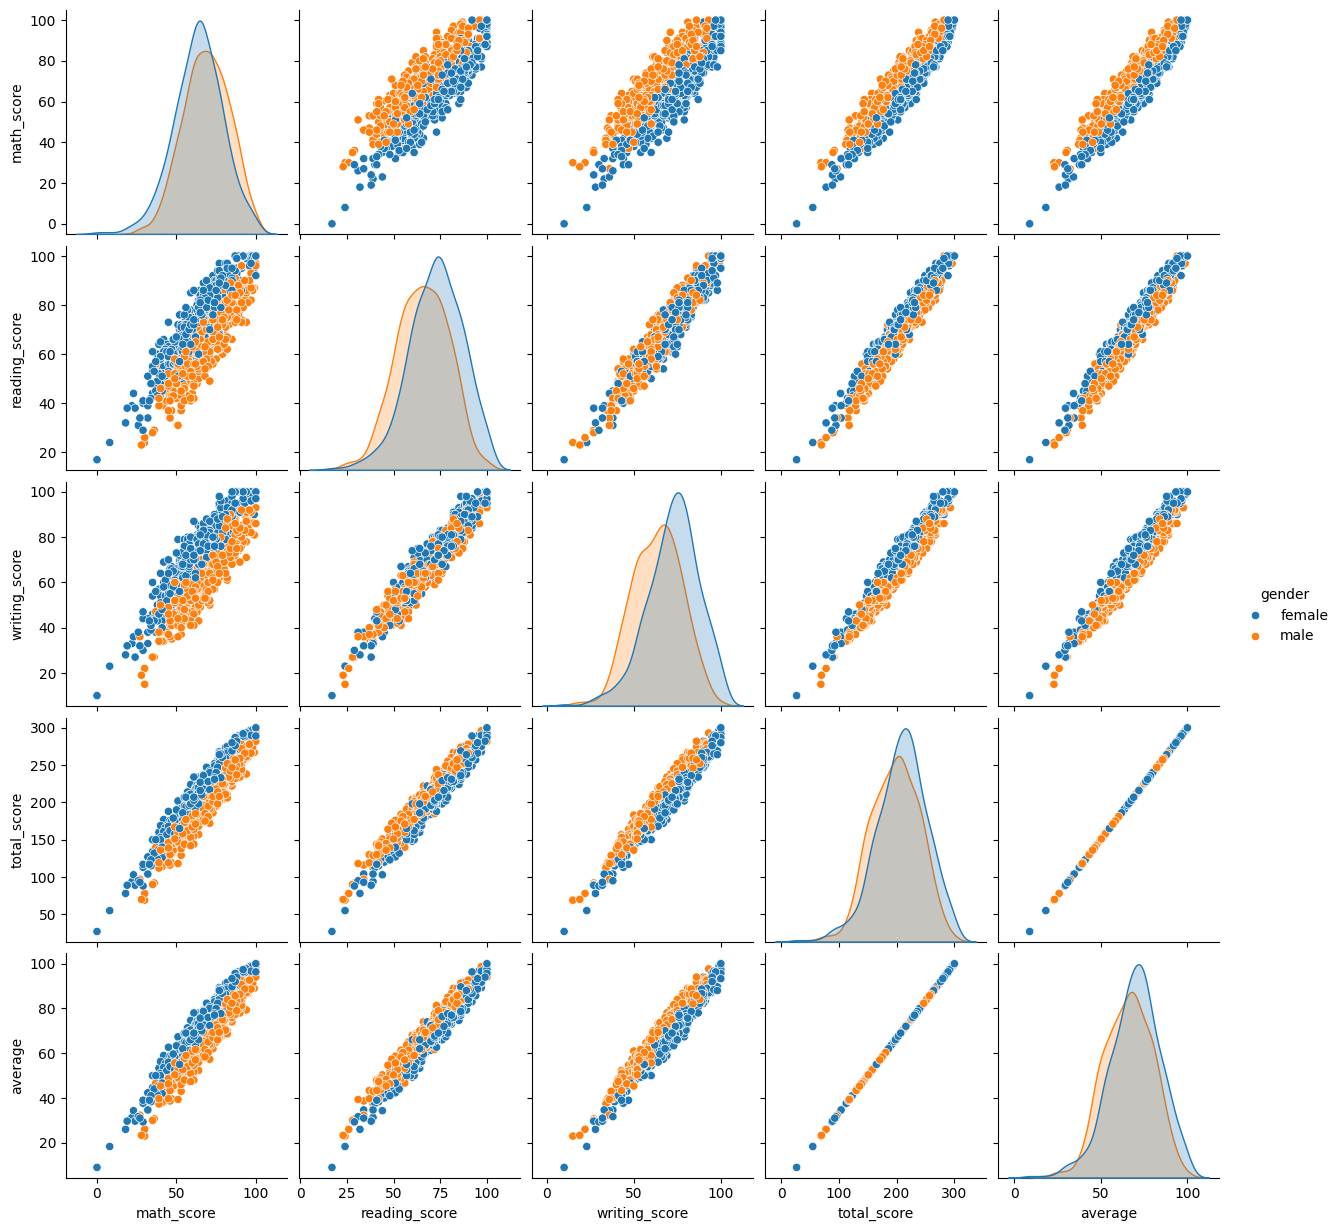

In [179]:
sns.pairplot(df, hue='gender')

In [180]:
#use lineplot when qualtity on x is time based number
sns.lineplot(df['math_score'], df['total_score'])

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

###### nun-cat (displot, barplot)

In [181]:
numerical_columns

['math_score', 'reading_score', 'writing_score']

In [182]:
categorical_columns

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

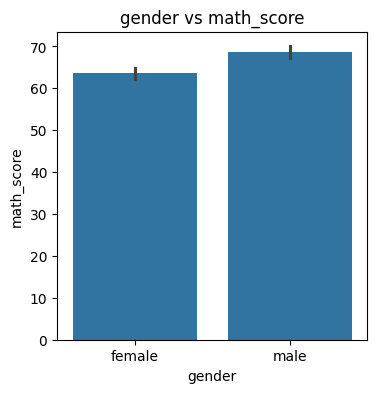

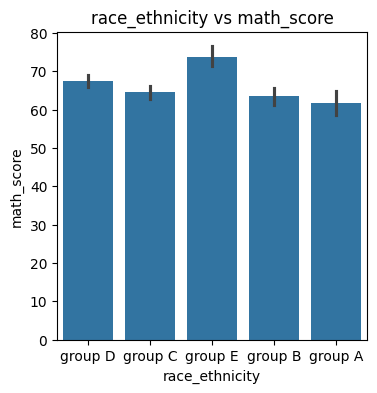

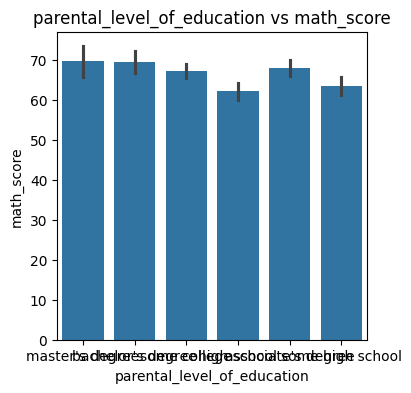

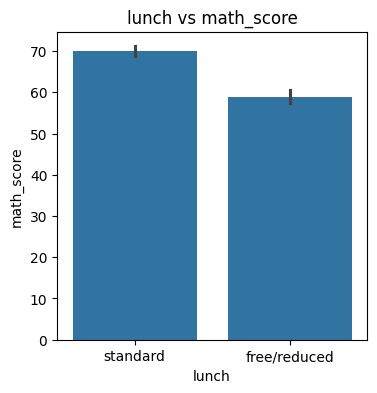

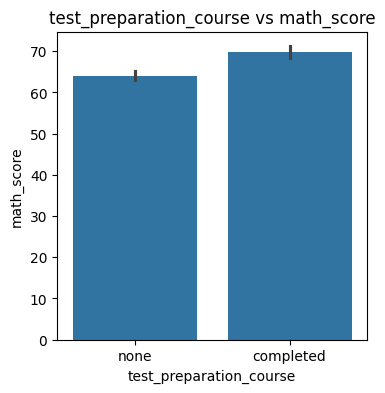

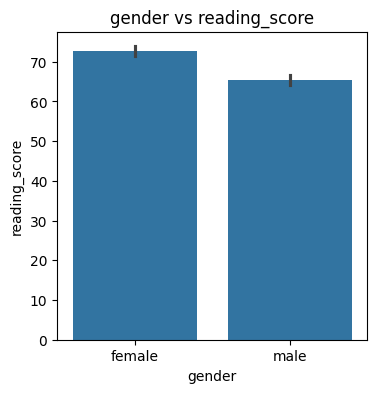

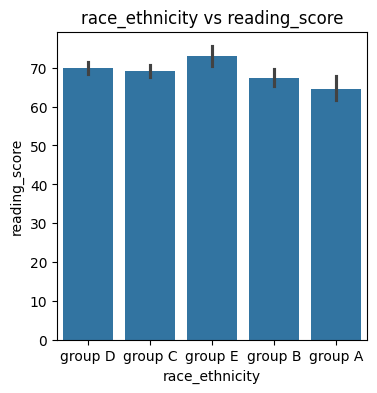

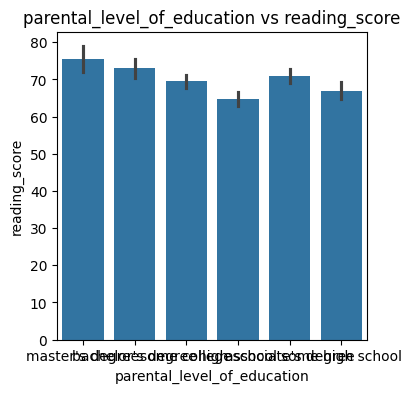

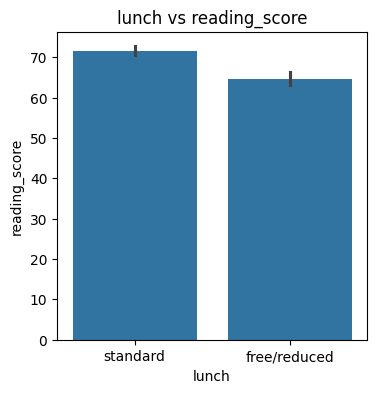

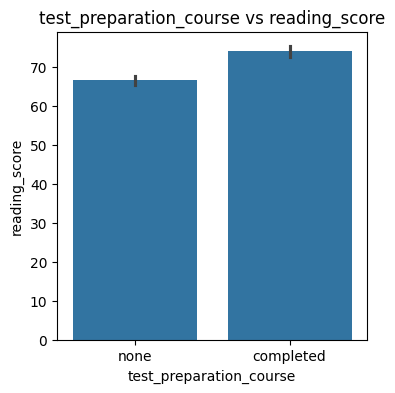

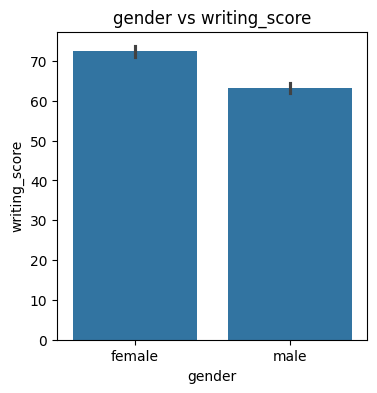

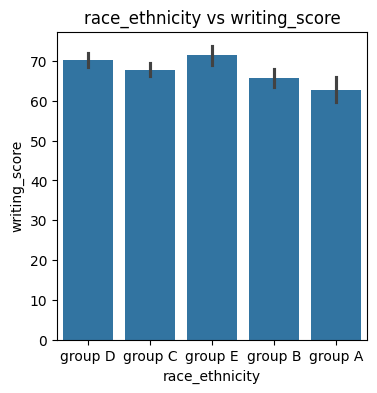

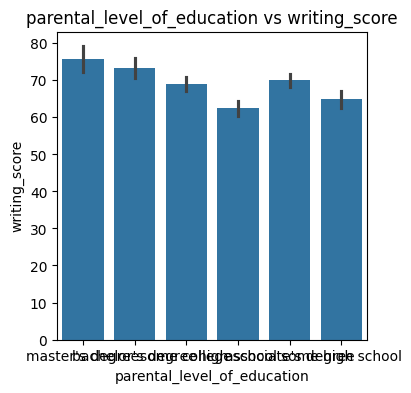

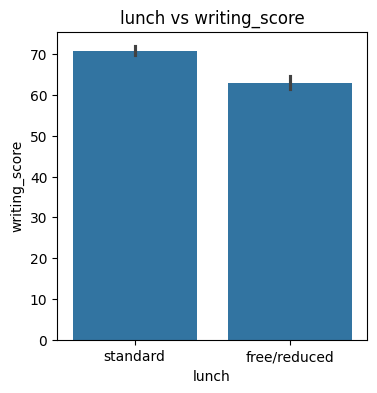

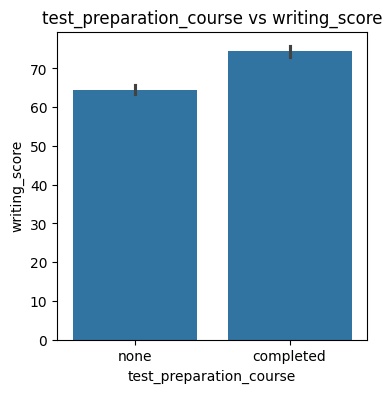

In [191]:
for col1 in numerical_columns:
    for col2 in categorical_columns:
        plt.figure(figsize=(4,4))
        sns.barplot(data = df , x=col2, y=col1)
        plt.title(f"{col2} vs {col1}")

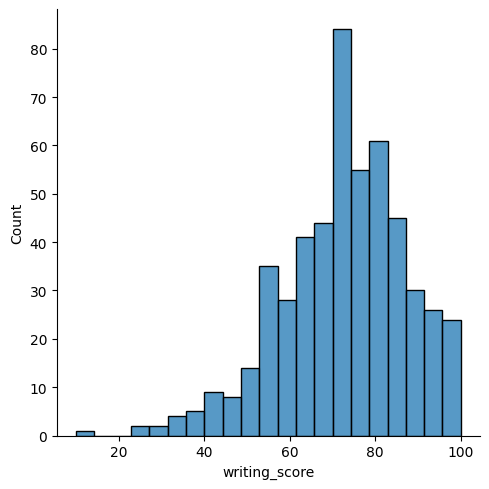

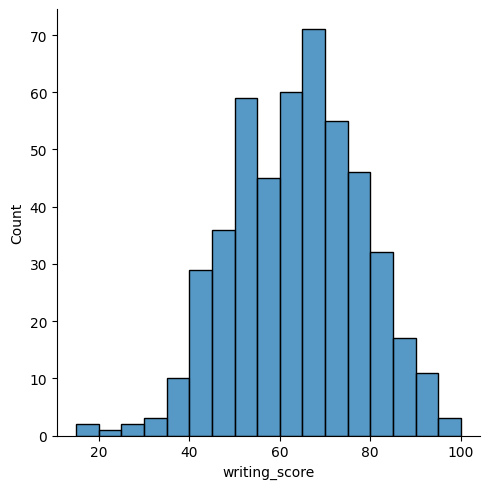

In [ ]:
ax1 = sns.displot(df[df['gender'] == 'female']['writing_score'])
ax2 = sns.displot(df[df['gender'] == 'male']['writing_score'])


###### cat-cat (heatmpa, clustermap)

gender vs race_ethnicity


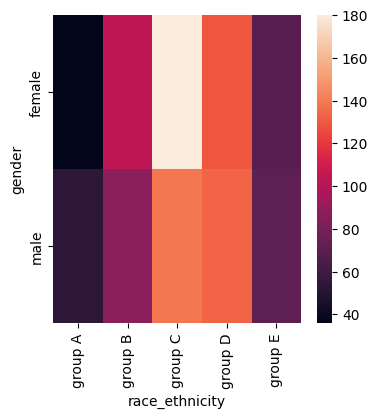

gender vs parental_level_of_education


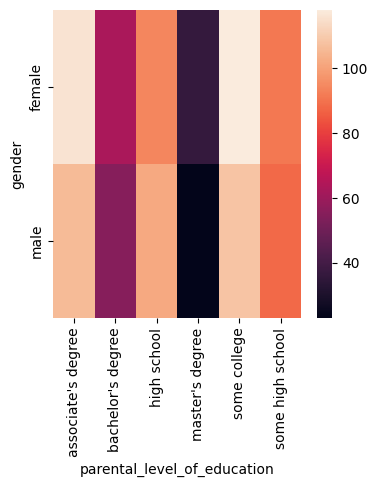

gender vs lunch


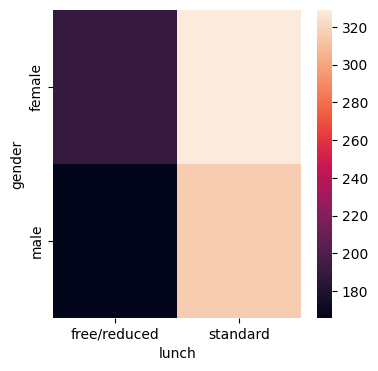

gender vs test_preparation_course


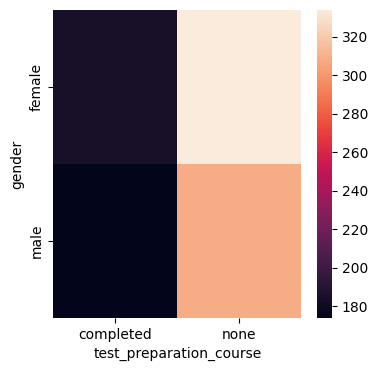

race_ethnicity vs parental_level_of_education


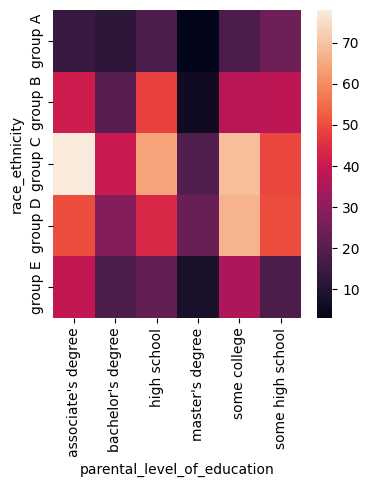

race_ethnicity vs lunch


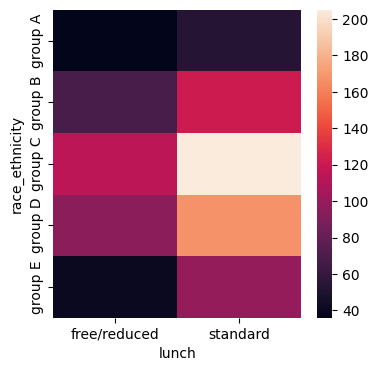

race_ethnicity vs test_preparation_course


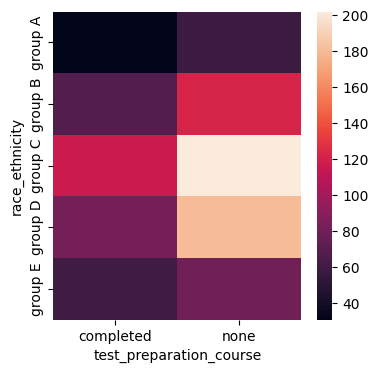

parental_level_of_education vs lunch


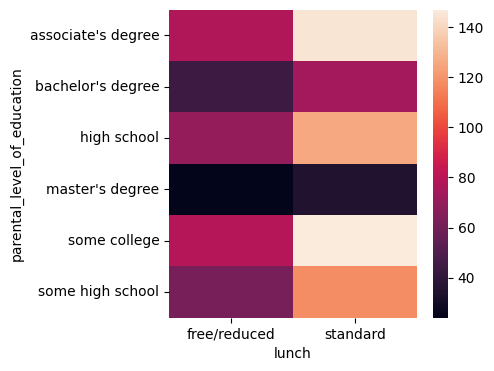

parental_level_of_education vs test_preparation_course


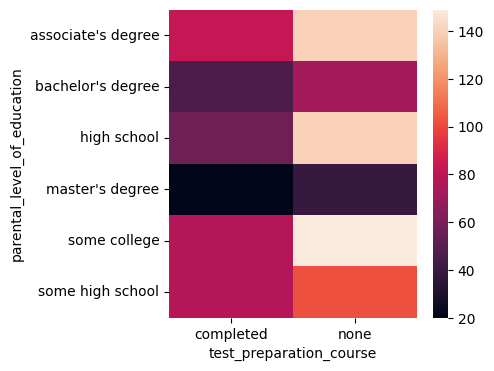

lunch vs test_preparation_course


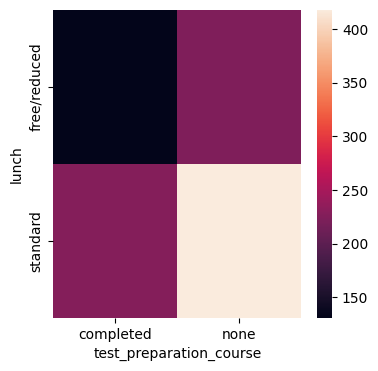

In [ ]:
for i in range (0,len(categorical_columns)):
    for j in range (i+1,len(categorical_columns)):
        print(categorical_columns[i],"vs",categorical_columns[j])
        x= pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        plt.figure(figsize=(4,4))
        sns.heatmap(x)
        plt.show()

In [213]:
df.groupby('gender')['test_preparation_course'].count()

gender
female    518
male      482
Name: test_preparation_course, dtype: int64

gender vs race_ethnicity


<Figure size 200x200 with 0 Axes>

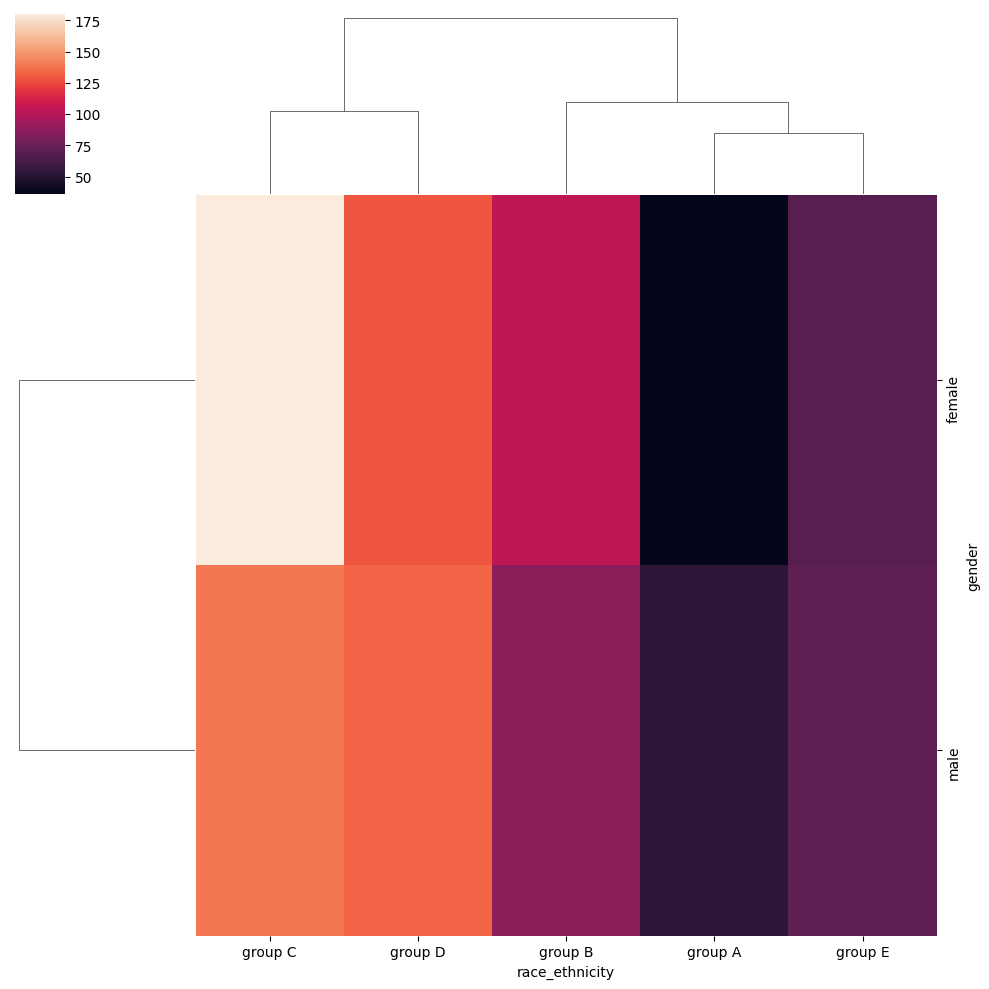

gender vs parental_level_of_education


<Figure size 200x200 with 0 Axes>

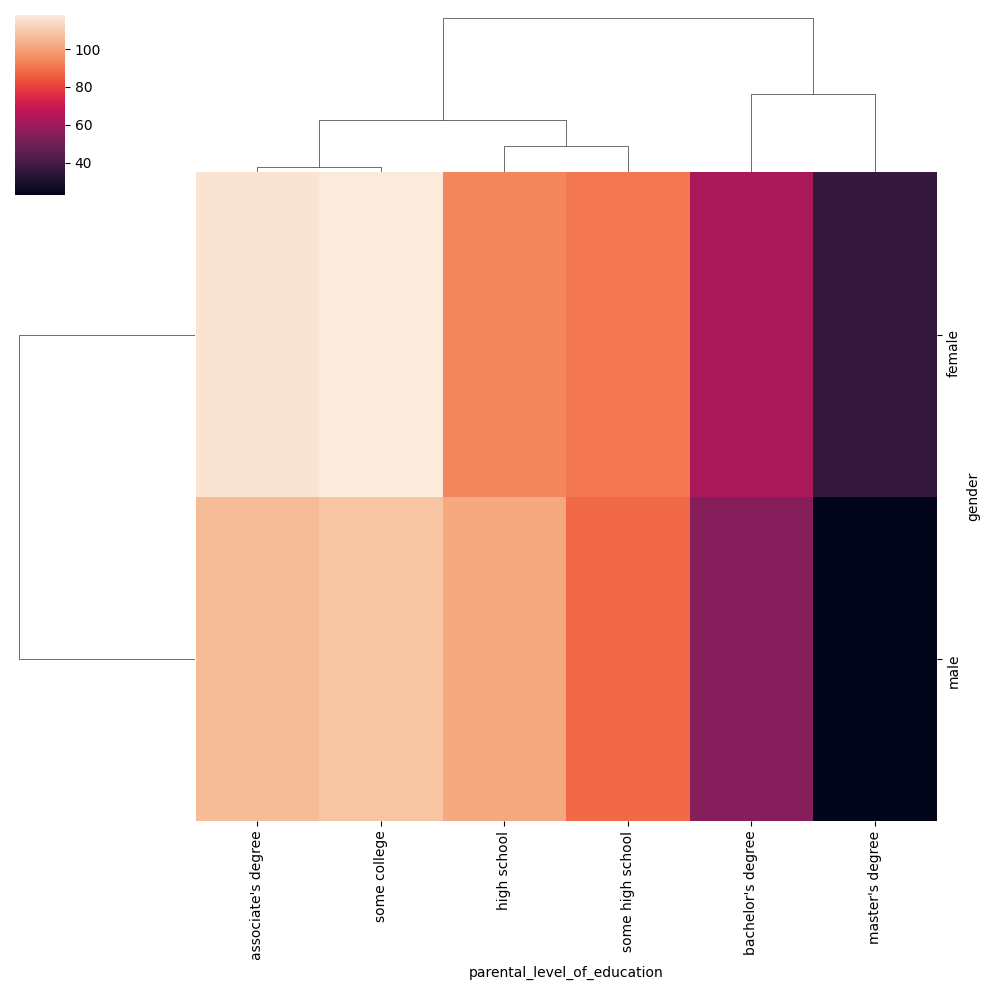

gender vs lunch


<Figure size 200x200 with 0 Axes>

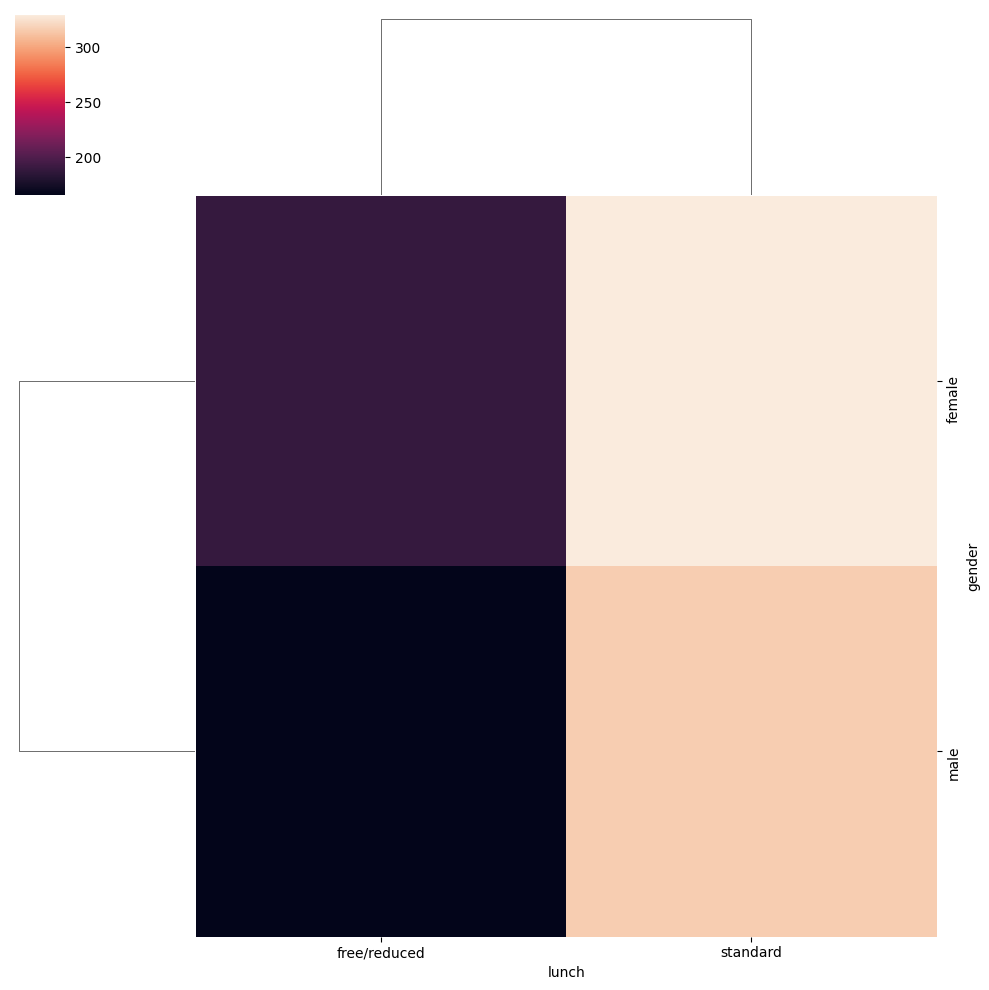

gender vs test_preparation_course


<Figure size 200x200 with 0 Axes>

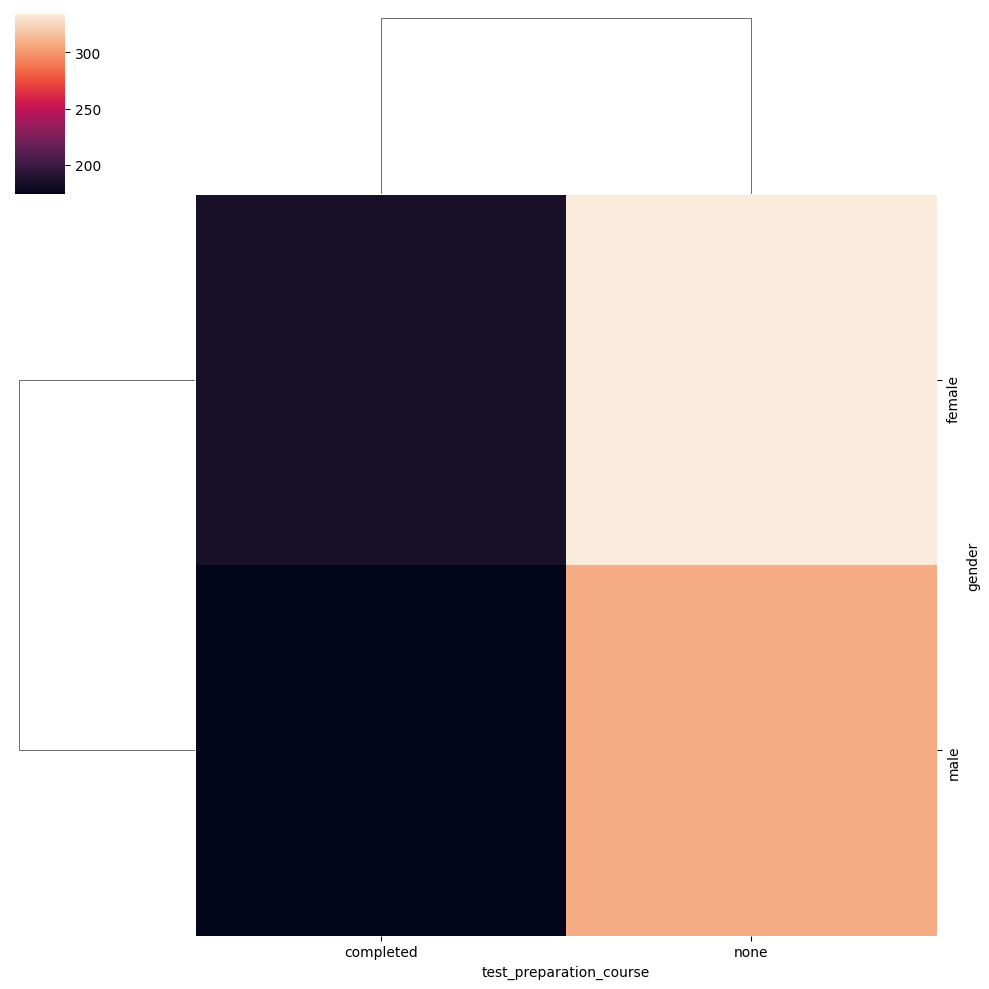

race_ethnicity vs parental_level_of_education


<Figure size 200x200 with 0 Axes>

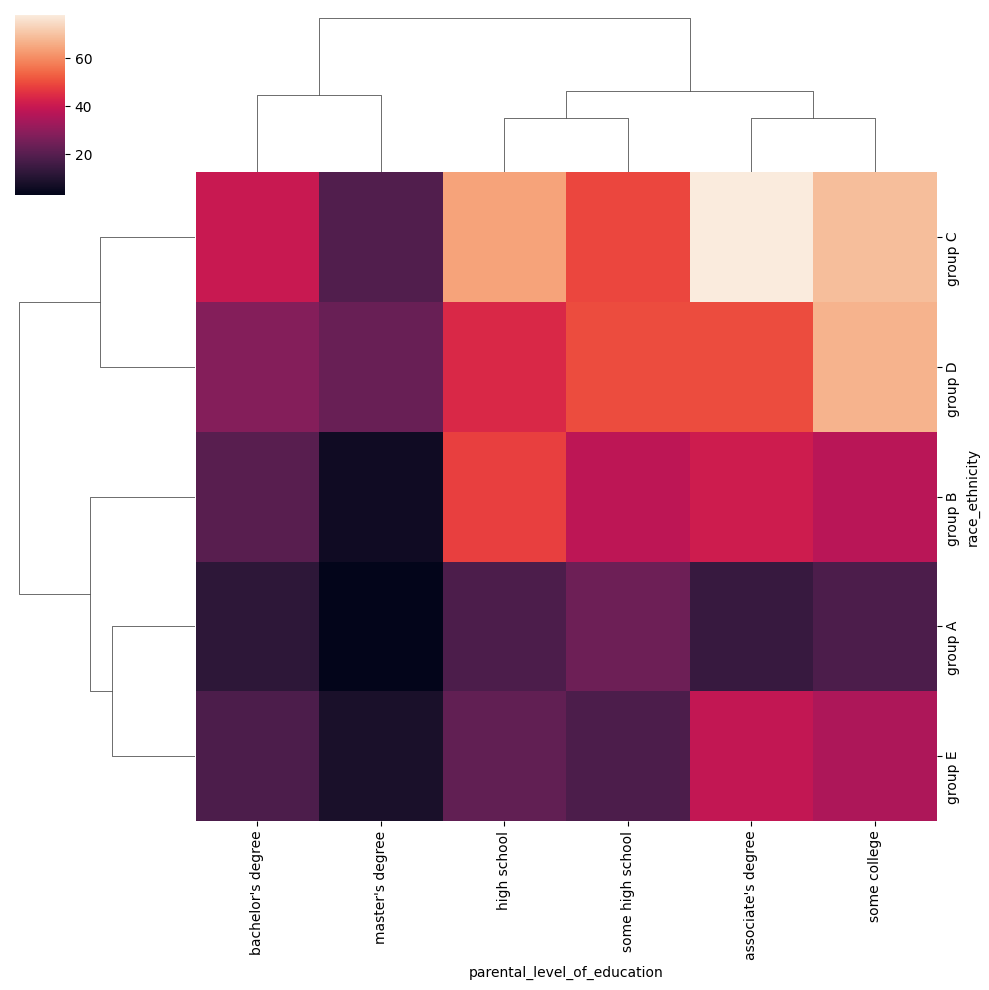

race_ethnicity vs lunch


<Figure size 200x200 with 0 Axes>

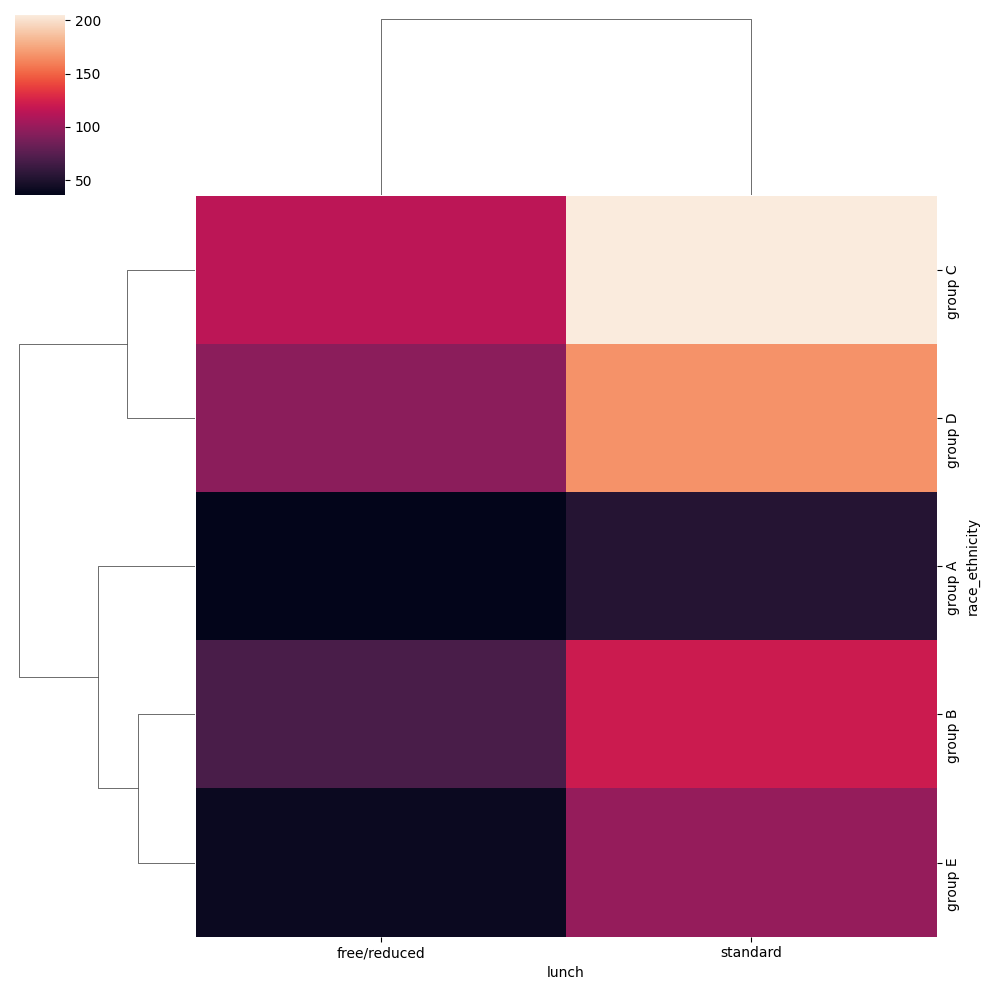

race_ethnicity vs test_preparation_course


<Figure size 200x200 with 0 Axes>

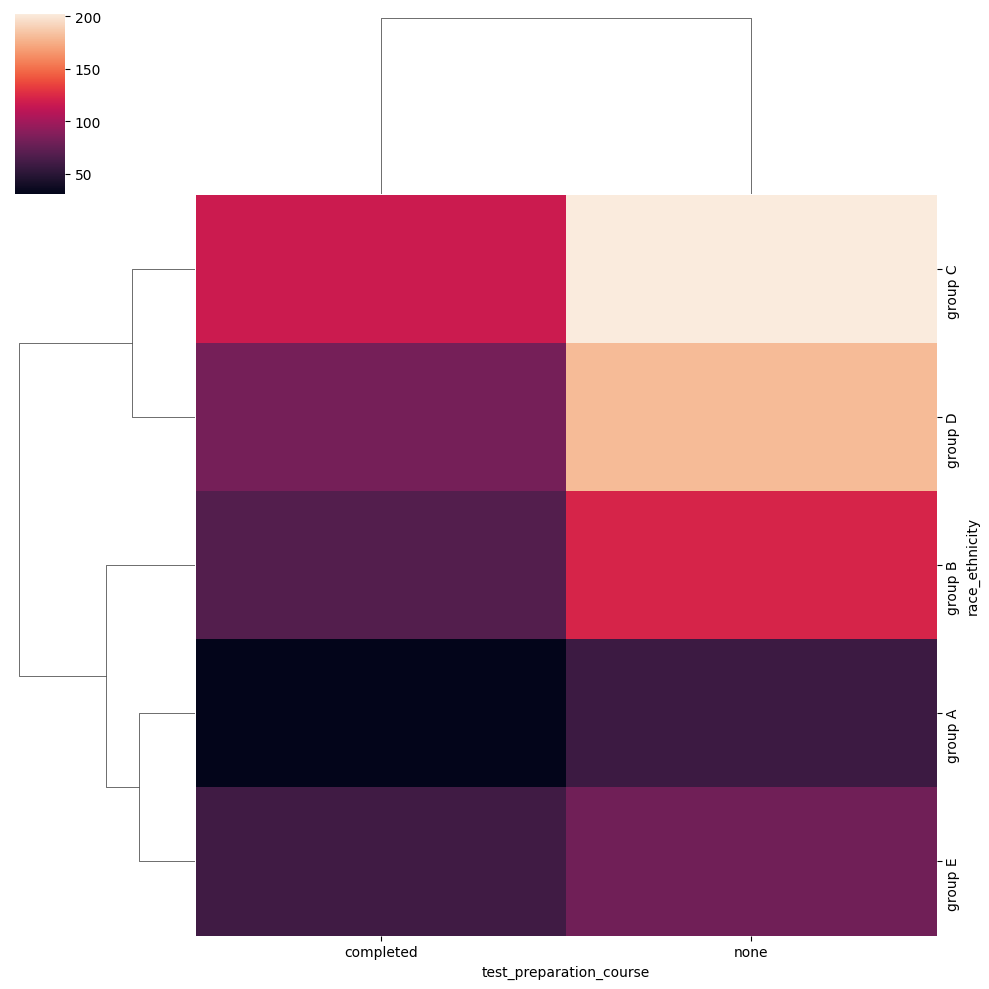

parental_level_of_education vs lunch


<Figure size 200x200 with 0 Axes>

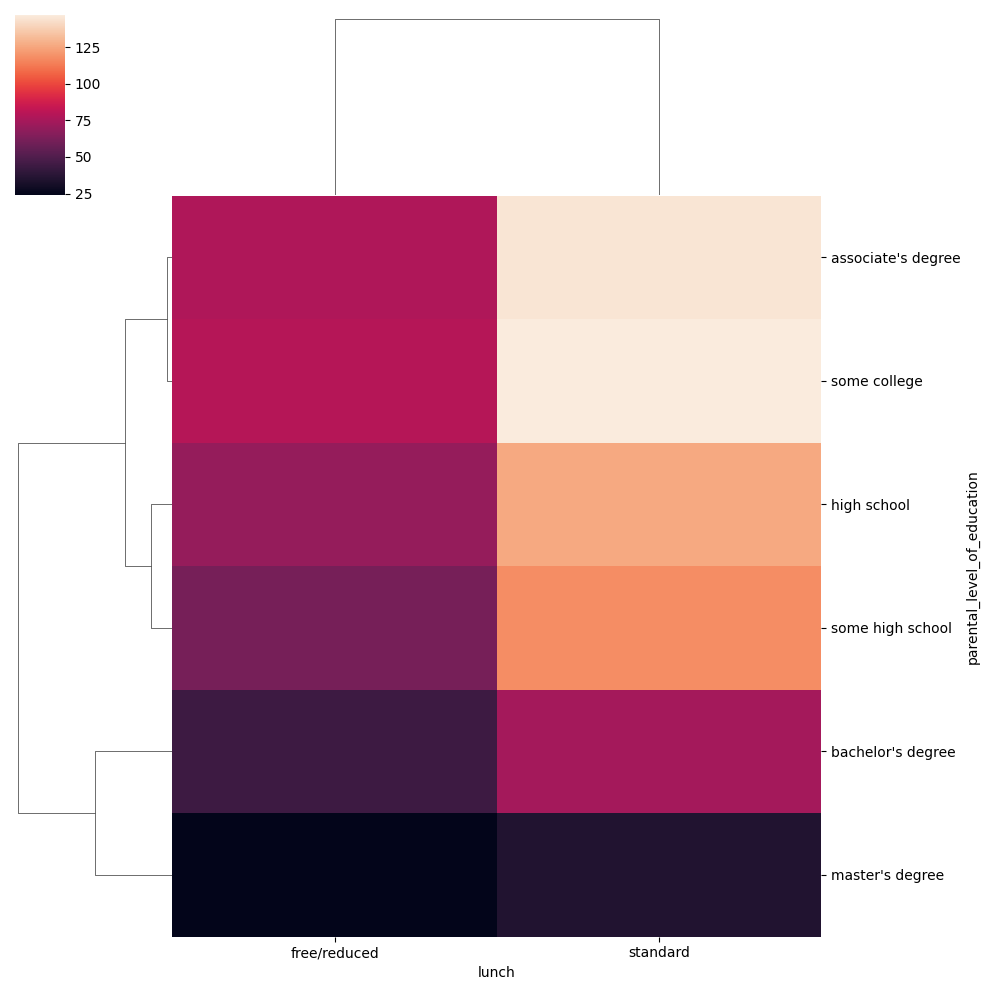

parental_level_of_education vs test_preparation_course


<Figure size 200x200 with 0 Axes>

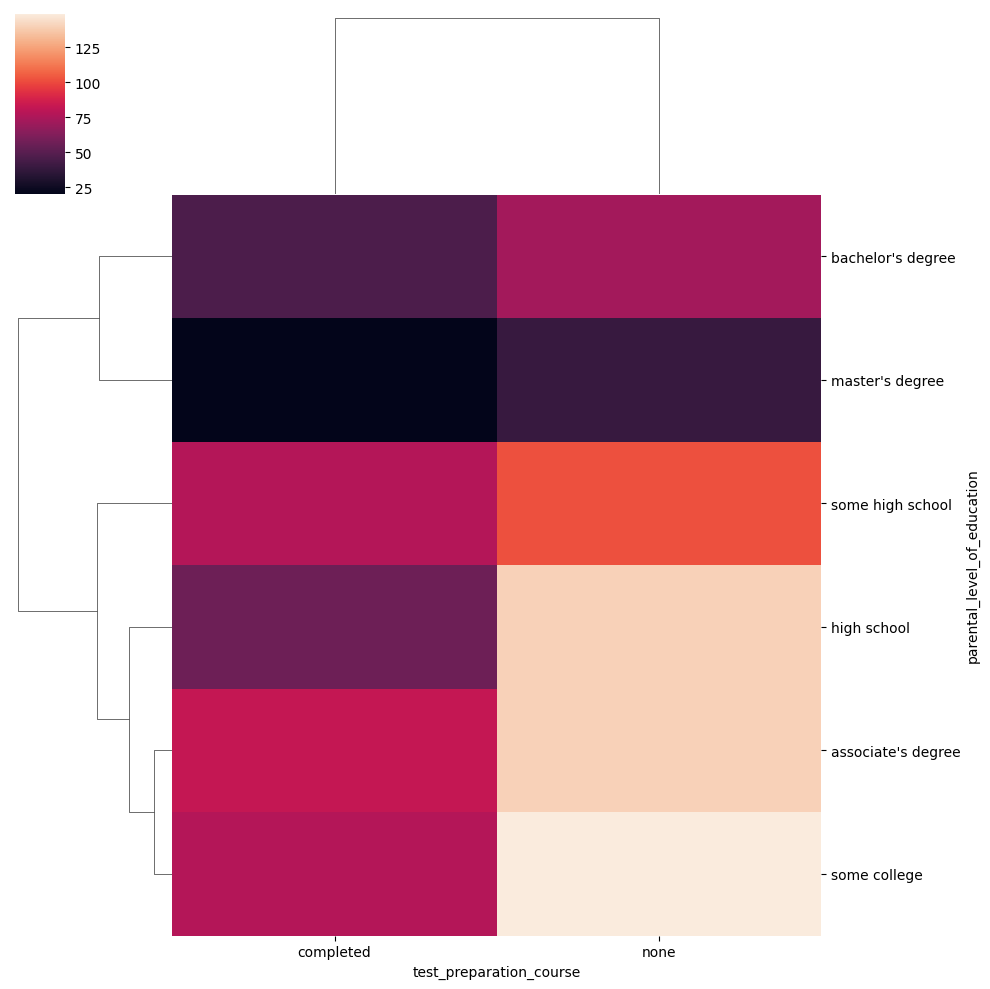

lunch vs test_preparation_course


<Figure size 200x200 with 0 Axes>

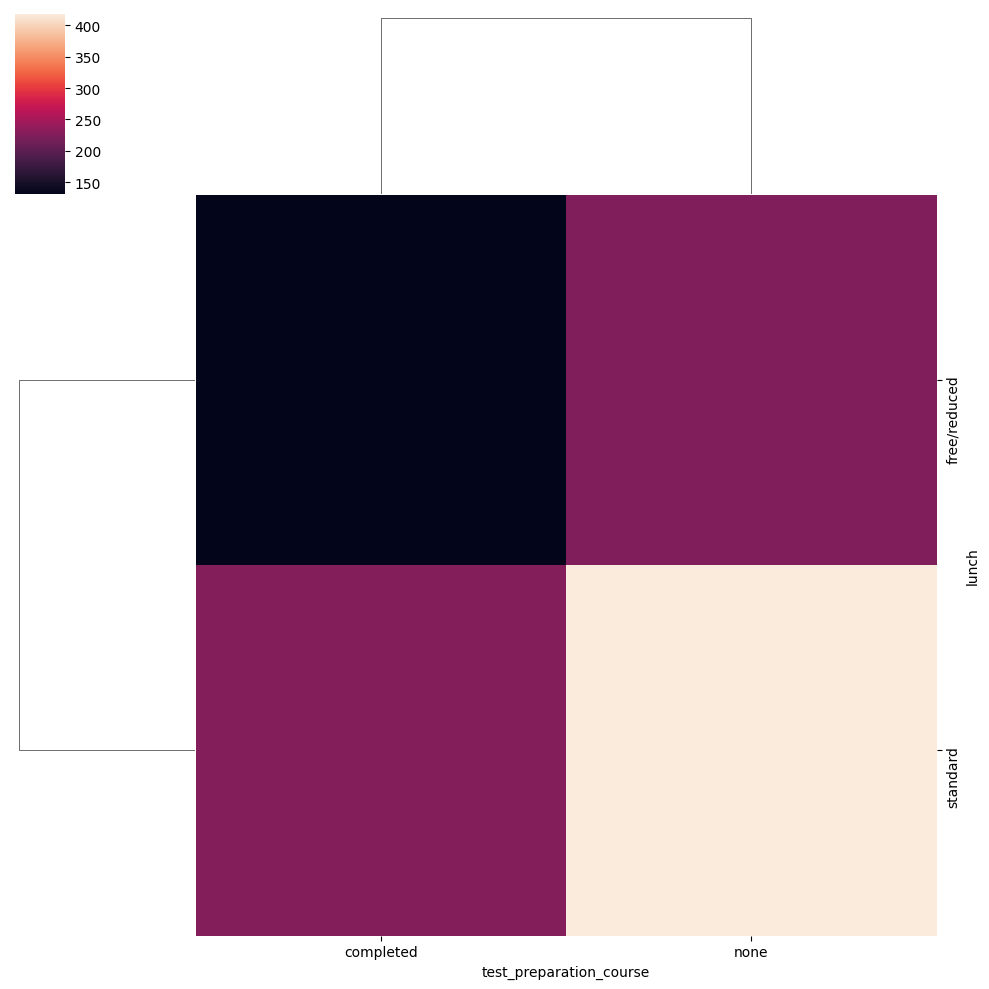

In [215]:
for i in range (0,len(categorical_columns)):
    for j in range (i+1,len(categorical_columns)):
        print(categorical_columns[i],"vs",categorical_columns[j])
        x= pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]])
        plt.figure(figsize=(2,2))
        sns.clustermap(x)
        plt.show()